<a href="https://colab.research.google.com/github/Avina20/MNIST-Handwiriting-Detection/blob/master/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

In [4]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train, x_test=x_train/255.0, x_test/255.0
print('Size of x_train', x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
Size of x_train (60000, 28, 28)


In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(135,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2975 - accuracy: 0.9135 - val_loss: 0.1432 - val_accuracy: 0.9573
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1462 - accuracy: 0.9572 - val_loss: 0.1070 - val_accuracy: 0.9670
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1080 - accuracy: 0.9673 - val_loss: 0.0840 - val_accuracy: 0.9735
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0870 - accuracy: 0.9732 - val_loss: 0.0800 - val_accuracy: 0.9754
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0756 - accuracy: 0.9766 - val_loss: 0.0765 - val_accuracy: 0.9769
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0653 - accuracy: 0.9788 - va

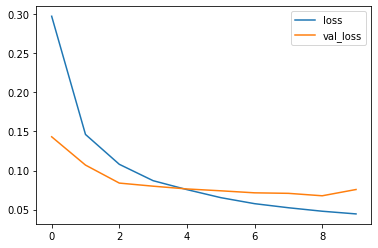

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

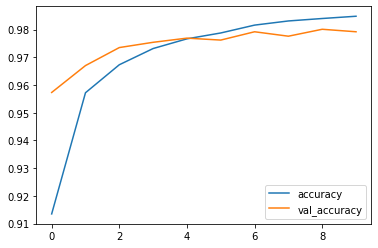

In [9]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [10]:
print(model.evaluate(x_test,y_test))

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0757 - accuracy: 0.9792
[0.07573973227264942, 0.9792]


In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

Confusion matrix, without normalization
[[ 969    0    1    0    2    1    2    3    2    0]
 [   0 1119    2    2    0    0    3    2    7    0]
 [   4    0 1005    3    3    0    2    6    9    0]
 [   0    0    8  993    0    1    0    4    4    0]
 [   1    0    5    0  971    0    1    0    1    3]
 [   2    0    0   12    1  862    5    4    3    3]
 [   3    2    0    1    4    3  941    0    4    0]
 [   1    1    8    1    0    0    0 1008    3    6]
 [   3    0    2    3    2    2    0    7  954    1]
 [   3    5    0    7   11    1    0    7    5  970]]


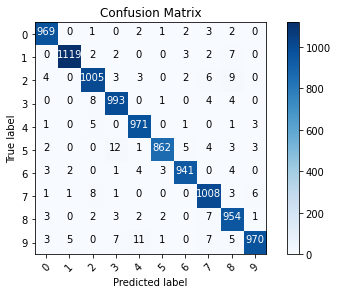

In [21]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))    
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize  else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: 9 Predicted label: 3')

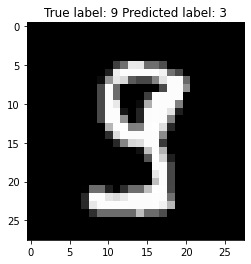

In [26]:
misclassified_ind = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_ind)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s Predicted label: %s' %(y_test[i], p_test[i]))